In [1]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from numpy.random import shuffle
import random
np.set_printoptions(threshold=np.inf)

batch_size = 64  # Batch size for training.
epochs = 350  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 26000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'one_to_one_dataset.txt'
print(epochs)

Using TensorFlow backend.


350


In [3]:
import io

#data_path = 'fra-eng/fra.txt'
file = open('dataset.txt','w',encoding="utf-8")

#with io.open(data_path, 'w', encoding=character_encoding) as file:
#    file.write(unicode_text)

check=0
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text = line.split(' ')
    #f.write(foo.encode('utf8'))
    if(check==0):
        file.write(line)
    else:
        file.write('\n'+line)
    check=1    
    #print(line)
for line in lines[:10000]:
    input_text, target_text = line.split(' ')
    file.write('\n'+target_text+' '+target_text)
    
file.close()    

In [4]:
# Vectorize the data.
data_path = 'dataset.txt'
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
    print(len(lines))
    print(lines[0])
    random.shuffle(lines)
    print(lines[0])
    
print(num_samples)    
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text = line.split(' ')
    # We use space(' ') as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = ' ' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

36000
﻿অ্যান্ডেজ অ্যান্ডেজ
শিক্ষককে শিক্ষক
26000
Number of samples: 26000
Number of unique input tokens: 65
Number of unique output tokens: 67
Max sequence length for inputs: 22
Max sequence length for outputs: 22


In [5]:
import json

data = {}  
data['input_output'] = []  
data['input_output'].append({  
    'num_encoder_tokens': num_encoder_tokens,
    'num_decoder_tokens': num_decoder_tokens,
    'max_encoder_seq_length': max_encoder_seq_length,
    'max_decoder_seq_length': max_decoder_seq_length
})

with open('important_data.txt', 'w') as outfile:  
    json.dump(data, outfile)

In [6]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [7]:
import json

print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

data = {}  
data['input_output'] = []  
data['input_output'].append({  
    'num_encoder_tokens': num_encoder_tokens,
    'num_decoder_tokens': num_decoder_tokens,
    'max_encoder_seq_length': max_encoder_seq_length,
    'max_decoder_seq_length': max_decoder_seq_length
})

data['input_index']=input_token_index;
data['target_index']=target_token_index;

with open('important_data.txt', 'w') as outfile:  
    json.dump(data, outfile)
    
#with open('important_data.txt', 'a') as outfile:  
 #   json.dump(input_token_index, outfile)   

Number of unique input tokens: 65
Number of unique output tokens: 67
Max sequence length for inputs: 22
Max sequence length for outputs: 22


In [8]:
all_char=[]
print("rana")
print(input_token_index)
print(target_token_index)
print(input_token_index['ক'])
print(np.shape(encoder_input_data))

rana
{'¬': 0, 'ঁ': 1, 'ং': 2, 'ঃ': 3, 'অ': 4, 'আ': 5, 'ই': 6, 'ঈ': 7, 'উ': 8, 'ঊ': 9, 'ঋ': 10, 'এ': 11, 'ঐ': 12, 'ও': 13, 'ঔ': 14, 'ক': 15, 'খ': 16, 'গ': 17, 'ঘ': 18, 'ঙ': 19, 'চ': 20, 'ছ': 21, 'জ': 22, 'ঝ': 23, 'ঞ': 24, 'ট': 25, 'ঠ': 26, 'ড': 27, 'ঢ': 28, 'ণ': 29, 'ত': 30, 'থ': 31, 'দ': 32, 'ধ': 33, 'ন': 34, 'প': 35, 'ফ': 36, 'ব': 37, 'ভ': 38, 'ম': 39, 'য': 40, 'র': 41, 'ল': 42, 'শ': 43, 'ষ': 44, 'স': 45, 'হ': 46, 'া': 47, 'ি': 48, 'ী': 49, 'ু': 50, 'ূ': 51, 'ৃ': 52, 'ে': 53, 'ৈ': 54, 'ো': 55, 'ৌ': 56, '্': 57, 'ৎ': 58, 'ড়': 59, 'ঢ়': 60, 'য়': 61, '\u200c': 62, '\u200d': 63, '\u200f': 64}
{'\n': 0, ' ': 1, '¬': 2, 'ঁ': 3, 'ং': 4, 'ঃ': 5, 'অ': 6, 'আ': 7, 'ই': 8, 'ঈ': 9, 'উ': 10, 'ঊ': 11, 'ঋ': 12, 'এ': 13, 'ঐ': 14, 'ও': 15, 'ঔ': 16, 'ক': 17, 'খ': 18, 'গ': 19, 'ঘ': 20, 'ঙ': 21, 'চ': 22, 'ছ': 23, 'জ': 24, 'ঝ': 25, 'ঞ': 26, 'ট': 27, 'ঠ': 28, 'ড': 29, 'ঢ': 30, 'ণ': 31, 'ত': 32, 'থ': 33, 'দ': 34, 'ধ': 35, 'ন': 36, 'প': 37, 'ফ': 38, 'ব': 39, 'ভ': 40, 'ম': 41, 'য': 42, 'র': 43, 'ল': 44, 'শ': 45

In [42]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [43]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
epochs=1
print(epochs)
# Run training
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])sparse_categorical_crossentropy
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
# Save model
model.save('s2s.h5')

1
Train on 20800 samples, validate on 5200 samples
Epoch 1/1
20800/20800 [==============================] - 398s 19ms/step - loss: 1.0002 - acc: 0.7312 - val_loss: 0.8898 - val_acc: 0.7612


C:\Users\RANA_CSE\Anaconda3\lib\site-packages\keras\engine\topology.py:2361: UserWarning: Layer lstm_10 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_9/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_9/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("test_model.h5")    

C:\Users\RANA_CSE\Anaconda3\lib\site-packages\keras\engine\topology.py:2361: UserWarning: Layer lstm_4 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_3_9/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_3_9/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


In [44]:
# Next: inference mode (sampling).
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
data_path = 'fra-eng/fra.txt'
print("kire")
model = load_model('s2s.h5')


encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index[' ']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence




def get_input_data(test_txt):
    #txt = input()
    txt=test_txt
    
    encoder_input_data = np.zeros(
    (len(txt), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
    
    txt = txt.replace(' ', '')
    
    for t, char in enumerate(txt):
        encoder_input_data[0, t, input_token_index[char]] = 1.
        
    return encoder_input_data
    
    
    
    
# Take one sequence (part of the training set)
# for trying out decoding.
#input_seq = encoder_input_data[seq_index: seq_index + 1]

with open(data_path, 'r', encoding='utf-8') as f:
    test_lines = f.read().split('\n')

test_input_texts=[]
test_target_texts=[]
for line in test_lines[30000: 40005]:
    #print(line)
    test_input_text, test_target_text = line.split(' ')
    #print(test_input_text)
    test_input_texts.append(test_input_text)
    test_target_texts.append(test_target_text+'\n')
    
#print(test_input_texts)   

total_test_input=0
total_accuracy=0

for i in range(100):
    total_test_input=total_test_input+1
    input_seq = get_input_data(test_input_texts[i])
    decoded_sentence = decode_sequence(input_seq)
    if (decoded_sentence==test_target_texts[i]):
        total_accuracy=total_accuracy+1
        #print('hoiche')
        
    print('Input sentence:',   test_input_texts[i])
    print('Decoded sentence:', decoded_sentence)
    #print(decoded_sentence[6])
    print('Target sentence:',  test_target_texts[i])
    #print(test_target_texts[i][6])
  
    
print('total_test_input:', total_test_input)
print('total_accuracy:', total_accuracy)
print('result:', (total_accuracy/total_test_input)*100,'%')

#yhat = model.predict(input_seq, verbose=0)
#print(yhat)

kire
Input sentence: পরিতোষকে
Decoded sentence: প্রা

Target sentence: পরিতোষ

Input sentence: আইনগুলোর
Decoded sentence: মালা

Target sentence: আইন

Input sentence: ট্রোজানের
Decoded sentence: প্রান

Target sentence: ট্রোজান

Input sentence: এনটিপিসিকে
Decoded sentence: মালা

Target sentence: এনটিপিসি

Input sentence: গণনাতে
Decoded sentence: বার

Target sentence: গণনা

Input sentence: থাইয়ের
Decoded sentence: মাল

Target sentence: থাই

Input sentence: বার্সেলোনারই
Decoded sentence: বার্যা

Target sentence: বার্সেলোনা

Input sentence: লিগনিনের
Decoded sentence: মালা

Target sentence: লিগনিন

Input sentence: কুর্মীর
Decoded sentence: বার্যা

Target sentence: কুর্মী

Input sentence: মেশিনগুলো
Decoded sentence: মালা

Target sentence: মেশিন

Input sentence: ফেরারির
Decoded sentence: মালা

Target sentence: ফেরারি

Input sentence: অ্যাভাটারের
Decoded sentence: প্রান্র

Target sentence: অ্যাভাটার

Input sentence: চাটাইগুলো
Decoded sentence: মালা

Target sentence: চা

Input sentence: কমিটিরই


In [13]:
# Restore the model and construct the encoder and decoder.
model = load_model('s2s.h5')

encoder_inputs = model.input[0]   # input_1
print(encoder_inputs)
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output   # lstm_1
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]   # input_2
decoder_state_input_h = Input(shape=(latent_dim,), name='input_3')
decoder_state_input_c = Input(shape=(latent_dim,), name='input_4')
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())


# Decodes an input sequence.  Future work should support beam search.
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    print(states_value)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index[' ']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

def get_input_data(test_txt):
    #txt = input()
    txt=test_txt
    
    encoder_input_data = np.zeros(
    (len(txt), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
    
    txt = txt.replace(' ', '')
    
    for t, char in enumerate(txt):
        encoder_input_data[0, t, input_token_index[char]] = 1.
        
    return encoder_input_data
    
    
    
    
# Take one sequence (part of the training set)
# for trying out decoding.
#input_seq = encoder_input_data[seq_index: seq_index + 1]

with open(data_path, 'r', encoding='utf-8') as f:
    test_lines = f.read().split('\n')

test_input_texts=[]
test_target_texts=[]
for line in test_lines[30000: 40005]:
    #print(line)
    test_input_text, test_target_text = line.split(' ')
    #print(test_input_text)
    test_input_texts.append(test_input_text)
    test_target_texts.append(test_target_text+'\n')
    
#print(test_input_texts)   

total_test_input=0
total_accuracy=0

for i in range(1000):
    total_test_input=total_test_input+1
    input_seq = get_input_data(test_input_texts[i])
    decoded_sentence = decode_sequence(input_seq)
    if (decoded_sentence==test_target_texts[i]):
        total_accuracy=total_accuracy+1
        #print('hoiche')
        
    print('Input sentence:',   test_input_texts[i])
    print('Decoded sentence:', decoded_sentence)
    #print(decoded_sentence[6])
    print('Target sentence:',  test_target_texts[i])
    #print(test_target_texts[i][6])
  
    
print('total_test_input:', total_test_input)
print('total_accuracy:', total_accuracy)
print('result:', (total_accuracy/total_test_input)*100,'%')

#yhat = model.predict(input_seq, verbose=0)
#print(yhat)

Tensor("input_3_5:0", shape=(?, ?, 68), dtype=float32)


RuntimeError: ('The name "input_4" is used 2 times in the model. All layer names should be unique. Layer names: ', ['input_4', 'input_3', 'input_4', 'lstm_4', 'dense_2'])

In [45]:
word_list=[]
data_path='newspaper(khela).txt'
with open(data_path, 'r', encoding='utf-8') as f:
    #lines = f.read().split(' ')
    for word in f.read().split():
        word_list.append(word)
    for word in word_list:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input sentence:',   word)
        print('Decoded sentence:', decoded_sentence)
        
print(len(word_list))        
print(word_list[0])

Input sentence: প্রেমাদাসার
Decoded sentence: প্রান্র

Input sentence: মাঠ
Decoded sentence: মালা

Input sentence: থেকে
Decoded sentence: এলা

Input sentence: শুরু
Decoded sentence: বার

Input sentence: করে
Decoded sentence: সে

Input sentence: সামাজিক
Decoded sentence: মালান

Input sentence: যোগাযোগমাধ্যম
Decoded sentence: প্রান

Input sentence: সবখানেই
Decoded sentence: সাল

Input sentence: চলছে
Decoded sentence: এলা

Input sentence: নাগিন
Decoded sentence: মালা

Input sentence: নাচ
Decoded sentence: সাল

Input sentence: কাল
Decoded sentence: সাল

Input sentence: রাতে
Decoded sentence: বার

Input sentence: শ্রীলঙ্কার
Decoded sentence: প্রান্র

Input sentence: বিপক্ষে
Decoded sentence: প্রান্র

Input sentence: অবিস্মরণীয়
Decoded sentence: প্রান

Input sentence: সেই
Decoded sentence: সে

Input sentence: জয়ের
Decoded sentence: মাল

Input sentence: পর
Decoded sentence: বার

Input sentence: মাঠেই
Decoded sentence: মালা

Input sentence: নাগিন
Decoded sentence: মালা

Input sentence: নাচ
Dec

Input sentence: এখন
Decoded sentence: এলেল

Input sentence: হয়ে
Decoded sentence: মাল

Input sentence: গেছে
Decoded sentence: এলে

Input sentence: এভাবেই
Decoded sentence: মাল

Input sentence: আসছে
Decoded sentence: সাল

Input sentence: নাজমুলের
Decoded sentence: মালা

Input sentence: এই
Decoded sentence: এএএএএ

Input sentence: নাগিন
Decoded sentence: মালা

Input sentence: নাচ
Decoded sentence: সাল

Input sentence: ত্রিদেশীয়
Decoded sentence: প্রান

Input sentence: সিরিজ
Decoded sentence: সালা

Input sentence: দিয়ে
Decoded sentence: সাল

Input sentence: জায়গা
Decoded sentence: মালা

Input sentence: করে
Decoded sentence: সে

Input sentence: নিয়েছে
Decoded sentence: সাল

Input sentence: আন্তর্জাতিক
Decoded sentence: সার্যান

Input sentence: মঞ্চে
Decoded sentence: বার্রা

Input sentence: বৈশ্বিক
Decoded sentence: প্রান

Input sentence: সংবাদমাধ্যমও
Decoded sentence: মান্রা

Input sentence: এই
Decoded sentence: এএএএএ

Input sentence: নাচকে
Decoded sentence: সালা

Input sentence: লুফে
Deco

In [50]:
word_list=[]
data_path='newspaper(feature).txt'
with open(data_path, 'r', encoding='utf-8') as f:
    #lines = f.read().split(' ')
    for word in f.read().split():
        word_list.append(word)
    for word in word_list:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input sentence:',   word)
        print('Decoded sentence:', decoded_sentence)
        
print(len(word_list))        
print(word_list[0])

Input sentence: সিঙ্গাপুরে
Decoded sentence: সিঙ্গাপুর

Input sentence: তাঁদের
Decoded sentence: তাঁদ

Input sentence: পরিচয়
Decoded sentence: পরিচয়

Input sentence: অভিবাসী
Decoded sentence: অভিবাসী

Input sentence: শ্রমিক
Decoded sentence: শ্রমিক

Input sentence: বিভিন্ন
Decoded sentence: বিভিন্ন

Input sentence: প্রতিষ্ঠানের
Decoded sentence: প্রতিষ্ঠান

Input sentence: হয়ে
Decoded sentence: হয়

Input sentence: নির্মাণযজ্ঞে
Decoded sentence: নির্মাণমভ্য

Input sentence: কাজ
Decoded sentence: কাজ

Input sentence: তাঁদের
Decoded sentence: তাঁদ

Input sentence: দিনমান
Decoded sentence: দিনমান

Input sentence: সে
Decoded sentence: সে

Input sentence: কাজই
Decoded sentence: কাজ

Input sentence: করেন
Decoded sentence: করেন

Input sentence: কিন্তু
Decoded sentence: কিন্তু

Input sentence: ফুরসত
Decoded sentence: ফুরসত

Input sentence: পেলেই
Decoded sentence: পেলে

Input sentence: গান
Decoded sentence: গান

Input sentence: ধরেন
Decoded sentence: ধরেন

Input sentence: গলা
Decoded sentence: গ

Input sentence: এক
Decoded sentence: এক

Input sentence: দিন
Decoded sentence: দিন

Input sentence: গানের
Decoded sentence: গান

Input sentence: মধ্যে
Decoded sentence: মধ্য

Input sentence: থাকলে
Decoded sentence: থাকল

Input sentence: সারা
Decoded sentence: সারা

Input sentence: সপ্তাহ
Decoded sentence: সপ্তাহ

Input sentence: কাজ
Decoded sentence: কাজ

Input sentence: করার
Decoded sentence: করার

Input sentence: শক্তি
Decoded sentence: শক্তি

Input sentence: পাওয়া
Decoded sentence: পাওয়া

Input sentence: যায়
Decoded sentence: যায়

Input sentence: গানের
Decoded sentence: গান

Input sentence: গলা
Decoded sentence: গলা

Input sentence: যেহেতু
Decoded sentence: যেহেতু

Input sentence: আছে
Decoded sentence: আছে

Input sentence: ভাবলাম
Decoded sentence: ভাবলাম

Input sentence: তা
Decoded sentence: তা

Input sentence: নিয়েই
Decoded sentence: নিয়ে

Input sentence: কিছু
Decoded sentence: কিছু

Input sentence: করতে
Decoded sentence: কর

Input sentence: হয়ে
Decoded sentence: হয়

Input sentence

Input sentence: পর্যন্ত
Decoded sentence: পর্যন্ত

Input sentence: পড়াশোনা
Decoded sentence: পড়াশোনা

Input sentence: করেছেন
Decoded sentence: করেছেন

Input sentence: ময়মনসিংহে
Decoded sentence: ময়মসংশিন

Input sentence: সেখানেই
Decoded sentence: সেখান

Input sentence: আমরা
Decoded sentence: আমরা

Input sentence: কয়েকজন
Decoded sentence: কয়েক

Input sentence: শিল্প
Decoded sentence: শিল্প

Input sentence: গোষ্ঠীর
Decoded sentence: গোষ্ঠী

Input sentence: সঙ্গে
Decoded sentence: সঙ্গ

Input sentence: যুক্ত
Decoded sentence: যুক্ত

Input sentence: ছিলেন
Decoded sentence: ছিল

Input sentence: সাতাশ
Decoded sentence: সাতাশ

Input sentence: বছর
Decoded sentence: বছর

Input sentence: বয়সী
Decoded sentence: বয়সী

Input sentence: এই
Decoded sentence: এই

Input sentence: তরুণ
Decoded sentence: তরুণ

Input sentence: সিঙ্গাপুরে
Decoded sentence: সিঙ্গাপুর

Input sentence: গেছেন
Decoded sentence: গেছেন

Input sentence: দুইহাজার
Decoded sentence: দুহাজার

Input sentence: সালে
Decoded sentence: সাল


In [62]:
word_list=[]
data_path='newspaper(rabindranath).txt'
with open(data_path, 'r', encoding='utf-8') as f:
    #lines = f.read().split(' ')
    for word in f.read().split():
        word_list.append(word)
    for word in word_list:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input sentence:',   word)
        print('Decoded sentence:', decoded_sentence)
        
print(len(word_list))        
print(word_list[0])

Input sentence: কন্যার
Decoded sentence: কন্যা

Input sentence: বাপ
Decoded sentence: বাপ

Input sentence: সবুর
Decoded sentence: সবুর

Input sentence: করিতে
Decoded sentence: করি

Input sentence: পারিতেন
Decoded sentence: পারিতেন

Input sentence: কিন্তু
Decoded sentence: কিন্তু

Input sentence: বরের
Decoded sentence: বর

Input sentence: বাপ
Decoded sentence: বাপ

Input sentence: সবুর
Decoded sentence: সবুর

Input sentence: করিতে
Decoded sentence: করি

Input sentence: চাহিলেন
Decoded sentence: চাহিল

Input sentence: না
Decoded sentence: না

Input sentence: তিনি
Decoded sentence: তিনি

Input sentence: দেখিলেন
Decoded sentence: দেখিলন

Input sentence: মেয়েটির
Decoded sentence: মেয়ে

Input sentence: বিবাহের
Decoded sentence: বিবাহ

Input sentence: বয়স
Decoded sentence: বয়স

Input sentence: পার
Decoded sentence: পার

Input sentence: হইয়া
Decoded sentence: হইয়া

Input sentence: গেছে
Decoded sentence: গেছ

Input sentence: কিন্তু
Decoded sentence: কিন্তু

Input sentence: আর
Decoded sentence: 

Input sentence: বিষম
Decoded sentence: বিষম

Input sentence: উদ্‌বেগ
Decoded sentence: উদ্বেগ

Input sentence: জন্মে
Decoded sentence: জন্ম

Input sentence: নাই
Decoded sentence: নাই

Input sentence: বরঞ্চ
Decoded sentence: বরঞ্চ

Input sentence: বিবাহের
Decoded sentence: বিবাহ

Input sentence: কথায়
Decoded sentence: কথা

Input sentence: আমার
Decoded sentence: আমার

Input sentence: মনের
Decoded sentence: মন

Input sentence: মধ্যে
Decoded sentence: মধ্য

Input sentence: যেন
Decoded sentence: যেন

Input sentence: দক্ষিনে
Decoded sentence: দক্ষিন

Input sentence: হাওয়া
Decoded sentence: হাওয়া

Input sentence: দিতে
Decoded sentence: দিত

Input sentence: লাগিল
Decoded sentence: লাগিল

Input sentence: কৌতূহলী
Decoded sentence: কৌতূহলী

Input sentence: কল্পনার
Decoded sentence: কল্পনা

Input sentence: কিশলয়গুলির
Decoded sentence: কিশলয়গুলি

Input sentence: মধ্যে
Decoded sentence: মধ্য

Input sentence: একটা
Decoded sentence: এক

Input sentence: যেন
Decoded sentence: যেন

Input sentence: কানাকা

Input sentence: বিবাদের
Decoded sentence: বিবাদ

Input sentence: কোনো
Decoded sentence: কোনো

Input sentence: আশঙ্কা
Decoded sentence: আশঙ্কা

Input sentence: নাই
Decoded sentence: নাই

Input sentence: যে
Decoded sentence: যে

Input sentence: তাম্রশাসনে
Decoded sentence: তাম্রশাসন

Input sentence: তাহার
Decoded sentence: তাহার

Input sentence: নাম
Decoded sentence: নাম

Input sentence: খোদাই
Decoded sentence: খোদা

Input sentence: করা
Decoded sentence: করা

Input sentence: আছে
Decoded sentence: আছে

Input sentence: সেটা
Decoded sentence: সেটা

Input sentence: আমার
Decoded sentence: আমার

Input sentence: হৃদয়পট
Decoded sentence: হৃদয়পট

Input sentence: কোনোকালে
Decoded sentence: কোনোকাল

Input sentence: সে
Decoded sentence: সে

Input sentence: পট
Decoded sentence: পট

Input sentence: এবং
Decoded sentence: এবং

Input sentence: সে
Decoded sentence: সে

Input sentence: নাম
Decoded sentence: নাম

Input sentence: বিলুপ্ত
Decoded sentence: বিলুপ্ত

Input sentence: হইবে
Decoded sentence: হইব



Input sentence: গর্ভ
Decoded sentence: গর্ভ

Input sentence: পূরণ
Decoded sentence: পূরণ

Input sentence: করিয়া
Decoded sentence: করিয়া

Input sentence: তুলিতেছে
Decoded sentence: তুলিছ

Input sentence: আমার
Decoded sentence: আমার

Input sentence: শ্বশুরের
Decoded sentence: শ্বশুর

Input sentence: বিশেষ
Decoded sentence: বিশেষণ

Input sentence: কোনো
Decoded sentence: কোনো

Input sentence: একটা
Decoded sentence: এক

Input sentence: মতের
Decoded sentence: মত

Input sentence: বালাই
Decoded sentence: বালা

Input sentence: ছিল
Decoded sentence: ছিল

Input sentence: না
Decoded sentence: না

Input sentence: তিনি
Decoded sentence: তিনি

Input sentence: পশ্চিমের
Decoded sentence: পশ্চিম

Input sentence: এক
Decoded sentence: এক

Input sentence: পাহাড়ের
Decoded sentence: পাহাড়

Input sentence: কোনো
Decoded sentence: কোনো

Input sentence: রাজার
Decoded sentence: রাজা

Input sentence: অধীনে
Decoded sentence: অধীন

Input sentence: বড়ো
Decoded sentence: বড়ো

Input sentence: কাজ
Decoded sentence: কাজ


Input sentence: তাহার
Decoded sentence: তাহার

Input sentence: চুল
Decoded sentence: চুল

Input sentence: টানিয়া
Decoded sentence: টানিয়া

Input sentence: বাঁধিয়া
Decoded sentence: বাঁধিয়া

Input sentence: খোঁপায়
Decoded sentence: খোঁপা

Input sentence: জরি
Decoded sentence: জরি

Input sentence: জড়াইয়া
Decoded sentence: জড়ায়া

Input sentence: সাহা
Decoded sentence: সাহা

Input sentence: বা
Decoded sentence: বা

Input sentence: মল্লিক
Decoded sentence: মল্লিক

Input sentence: কোম্পানির
Decoded sentence: কোম্পানি

Input sentence: জবড়জঙ
Decoded sentence: জবজড়

Input sentence: জ্যাকেট
Decoded sentence: জ্যাকেট

Input sentence: পরাইয়া
Decoded sentence: পরাইয়া

Input sentence: বরপক্ষের
Decoded sentence: বরপক্ষ

Input sentence: চোখ
Decoded sentence: চোখ

Input sentence: ভুলাইবার
Decoded sentence: ভুলাইবার

Input sentence: জন্য
Decoded sentence: জন্য

Input sentence: জালিয়াতির
Decoded sentence: জালিয়াতি

Input sentence: চেষ্টা
Decoded sentence: চেষ্টা

Input sentence: করে
Decoded sentence: কর


Input sentence: চৈতন্য
Decoded sentence: চৈতন্য

Input sentence: দিয়া
Decoded sentence: দিয়া

Input sentence: স্পর্শ
Decoded sentence: স্পর্শ

Input sentence: করিয়াছি
Decoded sentence: করিয়াছি

Input sentence: আমার
Decoded sentence: আমার

Input sentence: সেই
Decoded sentence: সেই

Input sentence: উনিশ
Decoded sentence: উনিশ

Input sentence: বছরের
Decoded sentence: বছর

Input sentence: বয়সটি
Decoded sentence: বয়স

Input sentence: আমার
Decoded sentence: আমার

Input sentence: জীবনে
Decoded sentence: জীবন

Input sentence: অক্ষয়
Decoded sentence: অক্ষয়

Input sentence: হইয়া
Decoded sentence: হইয়া

Input sentence: থাক্‌
Decoded sentence: থাক্ষ

Input sentence: বিবাহসভায়
Decoded sentence: বিবাহসভা

Input sentence: চারি
Decoded sentence: চারি

Input sentence: দিকে
Decoded sentence: দিক

Input sentence: হট্টগোল
Decoded sentence: হট্ট

Input sentence: তাহারই
Decoded sentence: তাহার

Input sentence: মাঝখানে
Decoded sentence: মাঝখান

Input sentence: কন্যার
Decoded sentence: কন্যা

Input sentence: 

Input sentence: খোওয়া
Decoded sentence: খোওয়া

Input sentence: যায়
Decoded sentence: যায়

Input sentence: বা
Decoded sentence: বা

Input sentence: চুরি
Decoded sentence: চুরি

Input sentence: যায়
Decoded sentence: যায়

Input sentence: বা
Decoded sentence: বা

Input sentence: নষ্ট
Decoded sentence: নষ্ট

Input sentence: হয়
Decoded sentence: হয়

Input sentence: আমি
Decoded sentence: আমি

Input sentence: তাহার
Decoded sentence: তাহার

Input sentence: জন্য
Decoded sentence: জন্য

Input sentence: দায়ী
Decoded sentence: দায়ী

Input sentence: নই
Decoded sentence: ইন

Input sentence: মেয়ে
Decoded sentence: মেয়ে

Input sentence: বলিল
Decoded sentence: বলিল

Input sentence: তাই
Decoded sentence: তাই

Input sentence: বৈকি
Decoded sentence: বৈকি

Input sentence: কোথাও
Decoded sentence: কোথা

Input sentence: একটু
Decoded sentence: এক

Input sentence: যদি
Decoded sentence: যদি

Input sentence: লোকসান
Decoded sentence: লোকসান

Input sentence: হয়
Decoded sentence: হয়

Input sentence: তোমাকে
Decoded se

Input sentence: দিলাম
Decoded sentence: দিলাম

Input sentence: এখন
Decoded sentence: এখন

Input sentence: ফিরিয়া
Decoded sentence: ফিরিয়া

Input sentence: তাকাইতে
Decoded sentence: তাকা

Input sentence: গেলে
Decoded sentence: গেল

Input sentence: দুঃখ
Decoded sentence: দুঃখ

Input sentence: পাইতে
Decoded sentence: পাই

Input sentence: হইবে
Decoded sentence: হইব

Input sentence: অধিকার
Decoded sentence: অধিকার

Input sentence: ছাড়িয়া
Decoded sentence: ছাড়িয়া

Input sentence: দিয়া
Decoded sentence: দিয়া

Input sentence: অধিকার
Decoded sentence: অধিকার

Input sentence: রাখিতে
Decoded sentence: রাখি

Input sentence: যাইবার
Decoded sentence: যাইবার

Input sentence: মতো
Decoded sentence: মতো

Input sentence: এমন
Decoded sentence: এমন

Input sentence: বিড়ম্বনা
Decoded sentence: বিড়ম্বনা

Input sentence: আর
Decoded sentence: আর

Input sentence: নাই
Decoded sentence: নাই

Input sentence: সব
Decoded sentence: সব

Input sentence: শেষে
Decoded sentence: শেষ

Input sentence: আমাকে
Decoded sentence:

Input sentence: আনা
Decoded sentence: আনা

Input sentence: বাকি
Decoded sentence: বাকি

Input sentence: থাকিয়া
Decoded sentence: থাকিয়া

Input sentence: যায়
Decoded sentence: যায়

Input sentence: আমার
Decoded sentence: আমার

Input sentence: সন্দেহ
Decoded sentence: সন্দেহ

Input sentence: হয়
Decoded sentence: হয়

Input sentence: অধিকাংশ
Decoded sentence: অধিকাংশ

Input sentence: লোকে
Decoded sentence: লো

Input sentence: স্ত্রীকে
Decoded sentence: স্ত্রী

Input sentence: বিবাহমাত্র
Decoded sentence: বিবাহমাত্র

Input sentence: করে
Decoded sentence: কর

Input sentence: পায়
Decoded sentence: পা

Input sentence: না
Decoded sentence: না

Input sentence: এবং
Decoded sentence: এবং

Input sentence: জানেও
Decoded sentence: জান

Input sentence: না
Decoded sentence: না

Input sentence: যে
Decoded sentence: যে

Input sentence: পায়
Decoded sentence: পা

Input sentence: নাই
Decoded sentence: নাই

Input sentence: তাহাদের
Decoded sentence: তাহাদ

Input sentence: স্ত্রীর
Decoded sentence: স্ত্রী

Inpu

Input sentence: আছে
Decoded sentence: আছে

Input sentence: সেটা
Decoded sentence: সেটা

Input sentence: বিস্তারিত
Decoded sentence: বিস্তারি

Input sentence: বলিবার
Decoded sentence: বলিবার

Input sentence: সময়
Decoded sentence: সময়

Input sentence: আসিয়াছে
Decoded sentence: আসিয়াছ

Input sentence: রাজসংসারে
Decoded sentence: রাজসংসা

Input sentence: আমার
Decoded sentence: আমার

Input sentence: শ্বশুরের
Decoded sentence: শ্বশুর

Input sentence: চাকরি
Decoded sentence: চাকরি

Input sentence: ব্যাঙ্কে
Decoded sentence: ব্যাঙ্ক

Input sentence: যে
Decoded sentence: যে

Input sentence: তাঁহার
Decoded sentence: তাঁহার

Input sentence: কত
Decoded sentence: কত

Input sentence: টাকা
Decoded sentence: টাকা

Input sentence: জমিল
Decoded sentence: জমিল

Input sentence: সে
Decoded sentence: সে

Input sentence: সম্বন্ধে
Decoded sentence: সম্বন্ধে

Input sentence: জনশ্রুতি
Decoded sentence: জনশ্রুতি

Input sentence: নানাপ্রকার
Decoded sentence: নানাপ্রকার

Input sentence: অঙ্কপাত
Decoded sentence: অ

Input sentence: ইচ্ছাপূর্বক
Decoded sentence: ইচ্ছাপূর্ক

Input sentence: প্রবঞ্চনা
Decoded sentence: প্রবঞ্চান

Input sentence: করিয়াছেন
Decoded sentence: করিয়াছেন

Input sentence: তার
Decoded sentence: তার

Input sentence: পরে
Decoded sentence: পরে

Input sentence: বাবার
Decoded sentence: বাবা

Input sentence: একটা
Decoded sentence: এক

Input sentence: ধারণা
Decoded sentence: ধারণা

Input sentence: ছিল
Decoded sentence: ছিল

Input sentence: আমার
Decoded sentence: আমার

Input sentence: শ্বশুর
Decoded sentence: শ্বশুর

Input sentence: রাজার
Decoded sentence: রাজা

Input sentence: প্রধান
Decoded sentence: প্রধান

Input sentence: মন্ত্রী
Decoded sentence: মন্ত্রী

Input sentence: গোছের
Decoded sentence: গোছ

Input sentence: একটা
Decoded sentence: এক

Input sentence: কিছু
Decoded sentence: কিছু

Input sentence: খবর
Decoded sentence: খবর

Input sentence: লইয়া
Decoded sentence: লয়া

Input sentence: জানিলেন
Decoded sentence: জানিলন

Input sentence: তিনি
Decoded sentence: তিনি

Input sentence

Input sentence: কুষ্ঠিতে
Decoded sentence: কুষ্ঠি

Input sentence: কি
Decoded sentence: কি

Input sentence: আর
Decoded sentence: আর

Input sentence: ফাঁকি
Decoded sentence: ফাঁকি

Input sentence: চলে
Decoded sentence: চলে

Input sentence: না
Decoded sentence: না

Input sentence: এই
Decoded sentence: এই

Input sentence: লইয়া
Decoded sentence: লয়া

Input sentence: ঘোর
Decoded sentence: ঘোর

Input sentence: তর্ক
Decoded sentence: তর্ক

Input sentence: এমন
Decoded sentence: এমন

Input sentence: কি
Decoded sentence: কি

Input sentence: বিবাদ
Decoded sentence: বিবাদ

Input sentence: হইয়া
Decoded sentence: হইয়া

Input sentence: গেল
Decoded sentence: গেল

Input sentence: এমন
Decoded sentence: এমন

Input sentence: সময়ে
Decoded sentence: সময়

Input sentence: সেখানে
Decoded sentence: সেখান

Input sentence: হৈম
Decoded sentence: হৈম

Input sentence: আসিয়া
Decoded sentence: আসিয়া

Input sentence: উপস্থিত
Decoded sentence: উপস্থিত

Input sentence: কোনো
Decoded sentence: কোনো

Input sentence: এক
Deco

Input sentence: পিটিয়া
Decoded sentence: পিটিয়া

Input sentence: বেড়াইতে
Decoded sentence: বেড়া

Input sentence: হইবে
Decoded sentence: হইব

Input sentence: আমাদের
Decoded sentence: আমাদ

Input sentence: এখানে
Decoded sentence: এখান

Input sentence: এসব
Decoded sentence: এসব

Input sentence: চলিবে
Decoded sentence: চলিব

Input sentence: না
Decoded sentence: না

Input sentence: বলিয়া
Decoded sentence: বলিয়া

Input sentence: রাখিতেছি
Decoded sentence: রাখিতিছ

Input sentence: হায়
Decoded sentence: হায়

Input sentence: রে
Decoded sentence: রে

Input sentence: তাঁহার
Decoded sentence: তাঁহার

Input sentence: বউমার
Decoded sentence: বউমা

Input sentence: প্রতি
Decoded sentence: প্রতি

Input sentence: বাবার
Decoded sentence: বাবা

Input sentence: সেই
Decoded sentence: সেই

Input sentence: মধুমাখা
Decoded sentence: মধুমাখা

Input sentence: পঞ্চম
Decoded sentence: পঞ্চম

Input sentence: স্বর
Decoded sentence: স্বর

Input sentence: আজ
Decoded sentence: আজ

Input sentence: একেবারে
Decoded senten

In [65]:
word_list=[]
data_path='newspaper(motamot).txt'
with open(data_path, 'r', encoding='utf-8') as f:
    for word in f.read().split():
        word_list.append(word)
    for word in word_list:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input sentence:',   word)
        print('Decoded sentence:', decoded_sentence)
        
print(len(word_list))        
print(word_list[0])

Input sentence: নব্বইয়ের
Decoded sentence: নব্বয়

Input sentence: দশকের
Decoded sentence: দশক

Input sentence: শুরুতে
Decoded sentence: শুরু

Input sentence: বুয়েট
Decoded sentence: বুয়েট

Input sentence: থেকে
Decoded sentence: থেকে

Input sentence: পাস
Decoded sentence: পাস

Input sentence: করেছেন
Decoded sentence: করেছেন

Input sentence: এ
Decoded sentence: এফ

Input sentence: রকম
Decoded sentence: রকম

Input sentence: এক
Decoded sentence: এক

Input sentence: প্রকৌশলী
Decoded sentence: প্রকৌশলী

Input sentence: বন্ধু
Decoded sentence: বন্ধু

Input sentence: আক্ষেপ
Decoded sentence: আক্ষেপ

Input sentence: করে
Decoded sentence: কর

Input sentence: বলেছিলেন
Decoded sentence: বলেছিল

Input sentence: তাঁর
Decoded sentence: তাঁর

Input sentence: ব্যাচের
Decoded sentence: ব্যাচ

Input sentence: পাঁচ
Decoded sentence: পাঁচ

Input sentence: শ
Decoded sentence: শ্রম

Input sentence: শিক্ষার্থীর
Decoded sentence: শিক্ষার্থী

Input sentence: মধ্য
Decoded sentence: মধ্য

Input sentence: এখন
Deco

Input sentence: আবশ্যক
Decoded sentence: আবশ্যক

Input sentence: যে
Decoded sentence: যে

Input sentence: দক্ষ
Decoded sentence: দক্ষ

Input sentence: জনশক্তি
Decoded sentence: জনশক্তি

Input sentence: তৈরি
Decoded sentence: তৈরি

Input sentence: করছি
Decoded sentence: করছি

Input sentence: তাদের
Decoded sentence: তাদের

Input sentence: ধরে
Decoded sentence: ধরে

Input sentence: রাখতে
Decoded sentence: রাখত

Input sentence: পারছি
Decoded sentence: পারছি

Input sentence: না
Decoded sentence: না

Input sentence: অন্যদিকে
Decoded sentence: অন্যদি

Input sentence: ব্যবসা
Decoded sentence: ব্যবসা

Input sentence: শিল্প
Decoded sentence: শিল্প

Input sentence: ও
Decoded sentence: উণ্য

Input sentence: সেবা
Decoded sentence: সেবা

Input sentence: খাতের
Decoded sentence: খাত

Input sentence: চাহিদা
Decoded sentence: চাহিদা

Input sentence: মেটাতে
Decoded sentence: মেটা

Input sentence: বিপুলসংখ্যক
Decoded sentence: বিপুলসংখ্যা

Input sentence: দক্ষ
Decoded sentence: দক্ষ

Input sentence: কর্মী

Input sentence: ভিত্তিতে
Decoded sentence: ভিত্তি

Input sentence: নিয়োগ
Decoded sentence: নিয়োগ

Input sentence: পেয়ে
Decoded sentence: পেয়ে

Input sentence: থাকে
Decoded sentence: থাক

Input sentence: এই
Decoded sentence: এই

Input sentence: হার
Decoded sentence: হার

Input sentence: যথাক্রমে
Decoded sentence: যথাক্রম

Input sentence: মুক্তিযোদ্ধা
Decoded sentence: মুক্তিযোদ্ধা

Input sentence: ও
Decoded sentence: উণ্য

Input sentence: তাঁদের
Decoded sentence: তাঁদ

Input sentence: পোষ্যদের
Decoded sentence: পোষ্য

Input sentence: ত্রিশ
Decoded sentence: ত্রিশ

Input sentence: শতাংশ
Decoded sentence: শতাংশ

Input sentence: নারী
Decoded sentence: নারী

Input sentence: দশ
Decoded sentence: দশ

Input sentence: শতাংশ
Decoded sentence: শতাংশ

Input sentence: জেলা
Decoded sentence: জেলা

Input sentence: কোটা
Decoded sentence: কোটা

Input sentence: দশ
Decoded sentence: দশ

Input sentence: শতাংশ
Decoded sentence: শতাংশ

Input sentence: আদিবাসী
Decoded sentence: আদিবাসী

Input sentence: পাঁচ


Input sentence: সামনে
Decoded sentence: সামন

Input sentence: নিয়ে
Decoded sentence: নিয়ে

Input sentence: আসার
Decoded sentence: আসা

Input sentence: জন্য
Decoded sentence: জন্য

Input sentence: কিন্তু
Decoded sentence: কিন্তু

Input sentence: সরকারি
Decoded sentence: সরকারি

Input sentence: চাকরিতে
Decoded sentence: চাকরি

Input sentence: কোটার
Decoded sentence: কোটার

Input sentence: নামে
Decoded sentence: নাম

Input sentence: এখন
Decoded sentence: এখন

Input sentence: মেধাবীদের
Decoded sentence: মেধাবী

Input sentence: পিছিয়ে
Decoded sentence: পিছি

Input sentence: রাখার
Decoded sentence: রাখা

Input sentence: যে
Decoded sentence: যে

Input sentence: কৌশল
Decoded sentence: কৌশল

Input sentence: সরকার
Decoded sentence: সরকার

Input sentence: নিয়েছে
Decoded sentence: নিয়েছ

Input sentence: তা
Decoded sentence: তা

Input sentence: আত্মঘাতী
Decoded sentence: আত্মঘাতী

Input sentence: এক
Decoded sentence: এক

Input sentence: অদ্ভুত
Decoded sentence: অদ্ভুত

Input sentence: নিয়মে
Decoded


Input sentence: উপদেষ্টা
Decoded sentence: উপদেষ্টা

Input sentence: আকবর
Decoded sentence: আকবর

Input sentence: আলি
Decoded sentence: আলি

Input sentence: খান
Decoded sentence: খান

Input sentence: বলেছেন
Decoded sentence: বলেছেন

Input sentence: পৃথিবীর
Decoded sentence: পৃথিবী

Input sentence: এমন
Decoded sentence: এমন

Input sentence: কোনো
Decoded sentence: কোনো

Input sentence: দেশ
Decoded sentence: দেশ

Input sentence: খুঁজে
Decoded sentence: খুঁজ

Input sentence: পাওয়া
Decoded sentence: পাওয়া

Input sentence: যাবে
Decoded sentence: যাবে

Input sentence: না
Decoded sentence: না

Input sentence: যেখানে
Decoded sentence: যেখান

Input sentence: কোটা
Decoded sentence: কোটা

Input sentence: মেধাকে
Decoded sentence: মেধা

Input sentence: ছাপিয়ে
Decoded sentence: ছাপিয়ে

Input sentence: যেতে
Decoded sentence: যেত

Input sentence: পারে
Decoded sentence: পারে

Input sentence: আমরা
Decoded sentence: আমরা

Input sentence: পারছি
Decoded sentence: পারছি

Input sentence: অর্থাৎ
Decoded sente

Input sentence: নামে
Decoded sentence: নাম

Input sentence: মেধাবীদের
Decoded sentence: মেধাবী

Input sentence: বঞ্চিত
Decoded sentence: বঞ্চিত

Input sentence: করার
Decoded sentence: করার

Input sentence: পথ
Decoded sentence: পথ

Input sentence: ছাড়তেই
Decoded sentence: ছাড়ত

Input sentence: হবে
Decoded sentence: হবে

898
নব্বইয়ের


In [44]:
#newspaper_file = open('newspaper.txt','w',encoding="utf-8")

#newspaper_file.write('আমার োনার বাংলা')
    
#newspaper_file.close()
word_list=[]
data_path='newspaper.txt'
with open(data_path, 'r', encoding='utf-8') as f:
    #lines = f.read().split(' ')
    for word in f.read().split():
        word_list.append(word)
    for word in word_list:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input sentence:',   word)
        print('Decoded sentence:', decoded_sentence)
        
print(len(word_list))        
print(word_list[0])
    #f = open('dictionary.txt')
    #ll=[]
    #for word in f.read().split():
     #   ll.append(word)
    #return ll    

Input sentence: অভিনন্দন
Decoded sentence: অভিনন্দন

Input sentence: বাংলাদেশ
Decoded sentence: বাংলাদেশ

Input sentence: অভিনন্দন
Decoded sentence: অভিনন্দন

Input sentence: সবাইকে
Decoded sentence: সবাই

Input sentence: যাঁরা
Decoded sentence: যাঁরা

Input sentence: আয়োজন
Decoded sentence: আয়োজন

Input sentence: করেছেন
Decoded sentence: করেছেন

Input sentence: যাঁরা
Decoded sentence: যাঁরা

Input sentence: অংশ
Decoded sentence: অংশ

Input sentence: নিয়েছেন
Decoded sentence: নিয়েছেন

Input sentence: যাঁরা
Decoded sentence: যাঁরা

Input sentence: দর্শনার্থী
Decoded sentence: দর্শনার্থী

Input sentence: হিসেবে
Decoded sentence: হিসেবে

Input sentence: গেছেন
Decoded sentence: গেছেন

Input sentence: তাঁদের
Decoded sentence: তাঁদে

Input sentence: সবাইকে
Decoded sentence: সবাই

Input sentence: অভিনন্দন
Decoded sentence: অভিনন্দন

Input sentence: একটা
Decoded sentence: এক

Input sentence: চমৎকার
Decoded sentence: চমকা

Input sentence: বইমেলার
Decoded sentence: বইমেলা

Input sentence: জন্য
D

Input sentence: বসার
Decoded sentence: বসা

Input sentence: জায়গা
Decoded sentence: জায়গা

Input sentence: ছিল
Decoded sentence: ছিল

Input sentence: হুইলচেয়ারের
Decoded sentence: হুলইচার

Input sentence: ব্যবস্থা
Decoded sentence: ব্যবস্থা

Input sentence: ছিল
Decoded sentence: ছিল

Input sentence: উন্মুক্ত
Decoded sentence: উন্মুক্ত

Input sentence: মঞ্চে
Decoded sentence: মঞ্চ

Input sentence: নাটক
Decoded sentence: নাটক

Input sentence: হয়েছে
Decoded sentence: হয়েছ

Input sentence: মোড়ক
Decoded sentence: মোড়ক

Input sentence: উন্মোচনের
Decoded sentence: উন্মোচন

Input sentence: মঞ্চে
Decoded sentence: মঞ্চ

Input sentence: মাইক্রোফোন
Decoded sentence: মাইক্রোফোন

Input sentence: ছিল
Decoded sentence: ছিল

Input sentence: একাডেমি
Decoded sentence: একাডেমি

Input sentence: মঞ্চে
Decoded sentence: মঞ্চ

Input sentence: সভা
Decoded sentence: সভা

Input sentence: সেমিনার
Decoded sentence: সেমিনার

Input sentence: হয়েছে
Decoded sentence: হয়েছ

Input sentence: এরই
Decoded sentence: এরই

I


Input sentence: যে
Decoded sentence: যু

Input sentence: তা
Decoded sentence: তা

Input sentence: একজীবনে
Decoded sentence: একবাজী

Input sentence: পড়ে
Decoded sentence: পড়

Input sentence: শেষ
Decoded sentence: শেষ

Input sentence: করা
Decoded sentence: করা

Input sentence: যাবে
Decoded sentence: যাবে

Input sentence: না
Decoded sentence: না

Input sentence: দ্বিতীয়ত
Decoded sentence: দ্বিতীয়তা

Input sentence: সাহিত্যের
Decoded sentence: সাহিত্য

Input sentence: মান
Decoded sentence: মান

Input sentence: একটা
Decoded sentence: এক

Input sentence: তর্কসাপেক্ষ
Decoded sentence: তর্সকাপবিকে

Input sentence: জিনিস
Decoded sentence: জিনিস

Input sentence: আমি
Decoded sentence: আমি

Input sentence: একবার
Decoded sentence: একবার

Input sentence: আবদুল্লাহ
Decoded sentence: আবদুল্লাহ

Input sentence: আবু
Decoded sentence: আবু

Input sentence: সায়ীদ
Decoded sentence: সায়ীদ

Input sentence: স্যারকে
Decoded sentence: স্যার

Input sentence: জিগ্যেস
Decoded sentence: জিগ্যেস

Input sentence: করে

Input sentence: কিন্তু
Decoded sentence: কিন্তু

Input sentence: পৃথিবীর
Decoded sentence: পৃথিবীর

Input sentence: আর
Decoded sentence: আর

Input sentence: কোনো
Decoded sentence: কোনো

Input sentence: দেশে
Decoded sentence: দেশ

Input sentence: এত
Decoded sentence: এত

Input sentence: মুদ্রণপ্রমাদকণ্টকিত
Decoded sentence: মুদ্রণপ্রমাদ্র

Input sentence: বই
Decoded sentence: বই

Input sentence: বেরোয়
Decoded sentence: বেরোয়

Input sentence: কি
Decoded sentence: কি

Input sentence: না
Decoded sentence: না

Input sentence: এই
Decoded sentence: এই

Input sentence: সন্দেহ
Decoded sentence: সন্দেহ

Input sentence: আমার
Decoded sentence: আমার

Input sentence: যায়
Decoded sentence: যা

Input sentence: না
Decoded sentence: না

Input sentence: সেই
Decoded sentence: সেই

Input sentence: জন্য
Decoded sentence: জন্য

Input sentence: আমরা
Decoded sentence: আমরা

Input sentence: চাই
Decoded sentence: চাই

Input sentence: প্রকাশকেরা
Decoded sentence: প্রকাশক

Input sentence: প্রতিষ্ঠান
Decoded senten

Input sentence: পঞ্চাশ
Decoded sentence: পঞ্চাশ

Input sentence: বছর
Decoded sentence: বছর

Input sentence: এর
Decoded sentence: এর

Input sentence: মতো
Decoded sentence: মতো

Input sentence: বৃহৎ
Decoded sentence: বৃহৎ

Input sentence: কলেবর
Decoded sentence: কলব

Input sentence: নন
Decoded sentence: নন

Input sentence: ফিকশন
Decoded sentence: ফিকশন

Input sentence: বই
Decoded sentence: বই

Input sentence: যে
Decoded sentence: যু

Input sentence: তরুণেরা
Decoded sentence: তরুণ

Input sentence: নির্ভুল
Decoded sentence: নির্ভুল

Input sentence: ছন্দে
Decoded sentence: ছন্দ

Input sentence: কবিতা
Decoded sentence: কবিতা

Input sentence: লেখেন
Decoded sentence: লেখন

Input sentence: কথাসাহিত্য
Decoded sentence: কথাসাহিত্য

Input sentence: করতে
Decoded sentence: কর

Input sentence: এসেছেন
Decoded sentence: এসেছেন

Input sentence: বাংলা
Decoded sentence: বাংলা

Input sentence: সাহিত্য
Decoded sentence: সাহিত্য

Input sentence: এমনকি
Decoded sentence: এমনিক

Input sentence: বিদেশি
Decoded s

Input sentence: লেখকেরা
Decoded sentence: লেখক

Input sentence: হচ্ছেন
Decoded sentence: হঞ্চ

Input sentence: এবার
Decoded sentence: এবার

Input sentence: আমাদের
Decoded sentence: আমাদের

Input sentence: পালা
Decoded sentence: পালা

Input sentence: আমরা
Decoded sentence: আমরা

Input sentence: বাংলায়
Decoded sentence: বাংলা

Input sentence: লিখেই
Decoded sentence: লিখে

Input sentence: আন্তর্জাতিক
Decoded sentence: আন্তর্তাজি

Input sentence: প্রকাশনা
Decoded sentence: প্রকাশনা

Input sentence: জগতে
Decoded sentence: জগ

Input sentence: প্রবেশ
Decoded sentence: প্রবেশ

Input sentence: করতে
Decoded sentence: কর

Input sentence: পারব
Decoded sentence: পারব

Input sentence: এটা
Decoded sentence: এটা

Input sentence: হবে
Decoded sentence: হবে

Input sentence: কারণ
Decoded sentence: কারণ

Input sentence: আমরা
Decoded sentence: আমরা

Input sentence: অর্থনৈতিকভাবে
Decoded sentence: অর্থনথিতি

Input sentence: ভালো
Decoded sentence: ভালো

Input sentence: করছি
Decoded sentence: করছি

Input sente

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


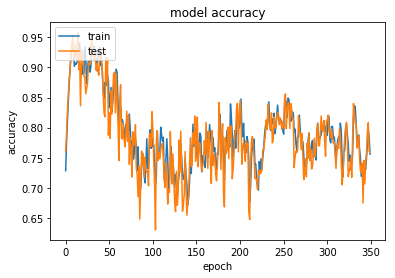

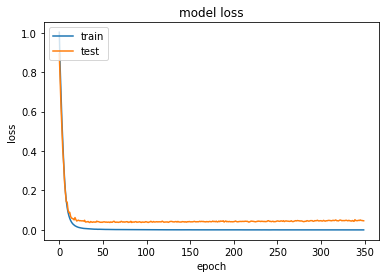

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
 #   input_seq = encoder_input_data[seq_index: seq_index + 1]
 #   decoded_sentence = decode_sequence(input_seq)
  #  print('-')
   # print('Input sentence:', input_texts[seq_index])
   # print('Decoded sentence:', decoded_sentence)
    
# Vectorize the data.
test_input_texts = []
test_target_texts = []
test_input_characters = set()
test_target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    test_lines = f.read().split('\n')
for line in test_lines[10005: 11005]:
    test_input_text, test_target_text = line.split(' ')
    # We use space(' ') as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    test_target_text = ' ' + test_target_text + '\n'
    test_input_texts.append(test_input_text)
    test_target_texts.append(test_target_text)
    for char in test_input_text:
        if char not in test_input_characters:
            test_input_characters.add(char)
    for char in test_target_text:
        if char not in test_target_characters:
            test_target_characters.add(char)

test_input_characters = sorted(list(test_input_characters))
test_target_characters = sorted(list(test_target_characters))
test_num_encoder_tokens = len(test_input_characters)
test_num_decoder_tokens = len(test_target_characters)
test_max_encoder_seq_length = max([len(txt) for txt in test_input_texts])
test_max_decoder_seq_length = max([len(txt) for txt in test_target_texts])

print('Number of samples:', len(test_input_texts))
print('Number of unique input tokens:', test_num_encoder_tokens)
print('Number of unique output tokens:', test_num_decoder_tokens)
print('Max sequence length for inputs:', test_max_encoder_seq_length)
print('Max sequence length for outputs:', test_max_decoder_seq_length)

test_input_token_index = dict(
    [(char, i) for i, char in enumerate(test_input_characters)])
test_target_token_index = dict(
    [(char, i) for i, char in enumerate(test_target_characters)])

test_encoder_input_data = np.zeros(
    (len(test_input_texts), test_max_encoder_seq_length, test_num_encoder_tokens),
    dtype='float32')
test_decoder_input_data = np.zeros(
    (len(test_input_texts), test_max_decoder_seq_length, test_num_decoder_tokens),
    dtype='float32')
test_decoder_target_data = np.zeros(
    (len(test_input_texts), test_max_decoder_seq_length, test_num_decoder_tokens),
    dtype='float32')

for i, (test_input_text, test_target_text) in enumerate(zip(test_input_texts, test_target_texts)):
    for t, char in enumerate(test_input_text):
        test_encoder_input_data[i, t, test_input_token_index[char]] = 1.
    for t, char in enumerate(test_target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        test_decoder_input_data[i, t, test_target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            test_decoder_target_data[i, t - 1, test_target_token_index[char]] = 1.

for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    test_input_seq = test_encoder_input_data[seq_index: seq_index + 1]
    print(test_input_seq)
    test_decoded_sentence = decode_sequence(test_input_seq)
    print('-')
    print('Input sentence:', test_input_texts[seq_index])
    print('Decoded sentence:', test_decoded_sentence)

Number of samples: 1000
Number of unique input tokens: 56
Number of unique output tokens: 58
Max sequence length for inputs: 22
Max sequence length for outputs: 22
[[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

ValueError: Error when checking : expected input_1 to have shape (None, 66) but got array with shape (22, 56)

In [72]:
#data_path='newspaper(khela).txt'
#with open(data_path, 'r', encoding='utf-8') as f:

with open('newspaper(khela).txt','r', encoding='utf-8') as f:
    lst = []
    for line in f:
        words = line.split()
        for word in words:
            if word not in lst:
                lst.append(word)    # append only this word to the list, not all words on this line
    lst.sort()
    print(lst)
    for word in lst:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input word:',   word)
        print('Decoded word:', decoded_sentence)
    print(len(lst))

['অধিনায়ক', 'অনেকে', 'অন্য', 'অপেক্ষাতেই', 'অবিশ্বাস্য', 'অবিস্মরণীয়', 'অসম্ভব', 'আগেরবার', 'আন্তর্জাতিক', 'আবিষ্কার', 'আরেকটি', 'আল', 'আসছে', 'আসলে', 'ইসলামের', 'উইকেট', 'উদ্\u200cযাপন', 'উদ্\u200cযাপনের', 'এঁকেবেঁকে', 'এই', 'একই', 'একটা', 'একাদশে', 'এখন', 'এটি', 'এভাবেই', 'এমনকি', 'এর', 'ওপর', 'ওর', 'করতে', 'করে', 'করেছিলেন', 'করেছেন', 'কাছ', 'কাছে', 'কারণে', 'কাল', 'কাড়েন', 'কিংসে', 'কিন্তু', 'কী', 'কে', 'কোনো', 'ক্রিকেট', 'ক্রিকেটপ্রেমীদের', 'কয়েকবারই', 'খেলার', 'খেলোয়াড়', 'খেলোয়াড়দের', 'খেলোয়াড়েরা', 'খেলোয়াড়েরাও', 'গত', 'গিয়েছিল', 'গুনাতিলকা', 'গেছে', 'গোটা', 'গ্যালারিতে', 'চলছে', 'ছবি', 'ছিলেন', 'ছড়িয়ে', 'জনক', 'জবাব', 'জায়গা', 'জেতানোর', 'জয়', 'জয়ের', 'টিম', 'ট্যাড', 'ট্রফিতে', 'ড্যারেন', 'তবে', 'তাঁকে', 'তাঁর', 'তাই', 'তারপর', 'তিনি', 'তুলে', 'তো', 'ত্রিদেশীয়', 'থেকে', 'থেকেই', 'দর্শকদের', 'দল', 'দলে', 'দলের', 'দিয়ে', 'দুনিয়াই', 'দৃষ্টি', 'দেখানো', 'দেখালে', 'দেখে', 'দেন', 'দেননি', 'দেশের', 'দ্বারস্থ', 'নজরেও', 'নাগিন', 'নাচ', 'নাচকে', 'নাচছে', 'নাচের', 'নাজমুল', 'নাজমুলকে', 'ন

Input word: ম্যাচটা
Decoded word: ম্যাচ

Input word: ম্যাচে
Decoded word: ম্যাচ

Input word: ম্যানেজমেন্টের
Decoded word: ম্যানেজমেন্ট

Input word: যাঁর
Decoded word: যাঁর

Input word: যাওয়া
Decoded word: যাওয়া

Input word: যে
Decoded word: যে

Input word: যোগাযোগমাধ্যম
Decoded word: যোগাযোগমাধ্যম

Input word: যোগাযোগমাধ্যমে
Decoded word: যোগাযোগমাধ্যম

Input word: রহস্য
Decoded word: রহস্য

Input word: রহিম
Decoded word: রহিম

Input word: রাজশাহী
Decoded word: রাজশাহী

Input word: রাতে
Decoded word: রাত

Input word: লুফে
Decoded word: লুফ

Input word: শুধু
Decoded word: শুধু

Input word: শুরু
Decoded word: শুরু

Input word: শেষ
Decoded word: শেষ

Input word: শ্রীলঙ্কা
Decoded word: শ্রীলঙ্কা

Input word: শ্রীলঙ্কার
Decoded word: শ্রীলঙ্কা

Input word: সংক্রমিত
Decoded word: সংক্রমিত

Input word: সংবাদকর্মীরা
Decoded word: সংবাদকর্মী

Input word: সংবাদমাধ্যমও
Decoded word: সংবাদমাধ্যম

Input word: সফরে
Decoded word: সফর

Input word: সবখানেই
Decoded word: সবখান

Input word: সবার
Decoded

In [73]:
with open('newspaper(feature).txt','r', encoding='utf-8') as f:
    lst = []
    for line in f:
        words = line.split()
        for word in words:
            if word not in lst:
                lst.append(word)    # append only this word to the list, not all words on this line
    lst.sort()
    print(lst)
    for word in lst:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input word:',   word)
        print('Decoded word:', decoded_sentence)
    print(len(lst))

['অনুষ্ঠানে', 'অনেকে', 'অনেকের', 'অন্যদের', 'অবশ্য', 'অভিবাসী', 'অর্থ', 'আগ্রহ', 'আছে', 'আছেন', 'আনন্দে', 'আবার', 'আমন্ত্রণ', 'আমরা', 'আমাদের', 'আর', 'আলাদা', 'আলাপটা', 'আশাবাদকে', 'আশায়', 'আসবে', 'আয়োজনে', 'ইসলাম', 'উচ্চাকাঙ্ক্ষা', 'উদ্যোগ', 'উৎফুল্লে', 'এই', 'এক', 'একজন', 'একটি', 'একদিন', 'একশটি', 'একসময়', 'এখন', 'এগিয়ে', 'এটুকুই', 'এরপর', 'ও', 'ওয়ার্কার্স', 'কথা', 'কথাও', 'কবীর', 'কবীরের', 'করতে', 'করা', 'করার', 'করি', 'করেছে', 'করেছেন', 'করেন', 'কাউন্ট', 'কাছে', 'কাজ', 'কাজই', 'কাটানো', 'কারণ', 'কার্যালয়ে', 'কি', 'কিছু', 'কিন্তু', 'কীভাবে', 'কেনা', 'কেনার', 'কোনো', 'কয়েকজন', 'কয়েকটি', 'খবর', 'খুব', 'গলা', 'গল্পও', 'গান', 'গানচর্চার', 'গানপাগল', 'গানে', 'গানের', 'গিটার', 'গিটারিস্ট', 'গেছেন', 'গেল', 'গেলেন', 'গোষ্ঠীর', 'গোড়া', 'গড়বেন', 'গড়ে', 'ঘরবন্দী', 'চর্চা', 'চলত', 'চলার', 'চলে', 'চাকরির', 'চারজনের', 'চেষ্টা', 'ছিল', 'ছিলেন', 'ছুটি', 'ছুটির', 'ছেড়ে', 'ছোটবেলায়', 'ছড়াবে', 'ছয়', 'ছয়জন', 'ছয়জনের', 'জন্য', 'জমানো', 'জাকির', 'জানা', 'জানার', 'জায়গাও', 'জায়গায়', 'জেনেছি', 'ঝরে', 'টাইম

Input word: তিনটা
Decoded word: তিন

Input word: তিনিও
Decoded word: তিনি

Input word: তুলেছেন
Decoded word: তুলেছেন

Input word: তেমন
Decoded word: তেমন

Input word: তো
Decoded word: তো

Input word: তোলেন
Decoded word: তোলেন

Input word: ত্রিশ
Decoded word: ত্রিশ

Input word: থাকতেও
Decoded word: থাকত

Input word: থাকবে
Decoded word: থাকব

Input word: থাকলে
Decoded word: থাকল

Input word: থাকে
Decoded word: থাক

Input word: থাকেন
Decoded word: থাকেন

Input word: থাকেব
Decoded word: থাকেব

Input word: থেকেই
Decoded word: থেকে

Input word: দরদ
Decoded word: দরদ

Input word: দরদই
Decoded word: দরদ

Input word: দর্শক
Decoded word: দর্শক

Input word: দল
Decoded word: দল

Input word: দলটা
Decoded word: দল

Input word: দলটি
Decoded word: দল

Input word: দলটির
Decoded word: দল

Input word: দলভুক্ত
Decoded word: দলভুক্ত

Input word: দলের
Decoded word: দল

Input word: দিন
Decoded word: দিন

Input word: দিনটি
Decoded word: দিন

Input word: দিনমান
Decoded word: দিনমান

Input word: দিয়েছেন
Decoded

Input word: হারমোনিয়ামে
Decoded word: হারমোনিয়াম

Input word: হাড়ভাঙা
Decoded word: হাড়ভাঙা

Input word: হিসেবে
Decoded word: হিসেব

Input word: হয়
Decoded word: হয়

Input word: হয়তো
Decoded word: হয়তো

Input word: হয়নি
Decoded word: হয়নি

Input word: হয়ে
Decoded word: হয়

Input word: হয়েছিল
Decoded word: হয়েছিল

Input word: হয়েছে
Decoded word: হয়েছ

354


In [74]:
with open('newspaper(rabindranath).txt','r', encoding='utf-8') as f:
    lst = []
    for line in f:
        words = line.split()
        for word in words:
            if word not in lst:
                lst.append(word)    # append only this word to the list, not all words on this line
    lst.sort()
    print(lst)
    for word in lst:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input word:',   word)
        print('Decoded word:', decoded_sentence)
    print(len(lst))

['অকলঙ্ক', 'অকাল', 'অকালের', 'অক্ষয়', 'অঙ্কটাই', 'অঙ্কটাও', 'অঙ্কপাত', 'অট্টহাস্যে', 'অতএব', 'অতি', 'অত্যন্ত', 'অথচ', 'অধিকাংশ', 'অধিকার', 'অধীনে', 'অধ্যক্ষ', 'অনর্থক', 'অনাবশ্যক', 'অনুগামী', 'অনুমোদিত', 'অনেককেই', 'অন্ত', 'অন্তঃপুরিকার', 'অন্তরকে', 'অন্তে', 'অন্দরে', 'অন্ধকার', 'অন্য', 'অপথ্য', 'অপরাধীর', 'অপু', 'অবশেষে', 'অবসর', 'অবস্থা', 'অবাক', 'অবৈধ', 'অভদ্র', 'অভাব', 'অমন', 'অমৃতলোকে', 'অরুণোদয়', 'অর্থ', 'অর্থসমাগম', 'অর্থাৎ', 'অল্পদিনেই', 'অশ্রু', 'অশ্রুবিন্দুটি', 'অশ্রুশূন্য', 'অশ্রুহীন', 'অস্ফুট', 'আঁচেই', 'আইবড়', 'আঙুল', 'আচ্ছা', 'আছে', 'আজ', 'আত্মীয়া', 'আদরও', 'আনা', 'আনাগোনা', 'আনাড়ি', 'আনিতে', 'আপন', 'আপনাকে', 'আপনি', 'আপেক্ষিক', 'আবাদের', 'আবার', 'আভাসে', 'আভ্যন্তরিক', 'আমরা', 'আমাকে', 'আমাকেও', 'আমাদের', 'আমাদেরই', 'আমার', 'আমি', 'আমিই', 'আমৃত্যুকাল', 'আর', 'আরো', 'আলো', 'আলোচনাই', 'আশঙ্কা', 'আশা', 'আশীর্বাদ', 'আশীর্বাদে', 'আশ্চর্য', 'আশ্বাস', 'আসক্তি', 'আসছে', 'আসল', 'আসিবার', 'আসিলে', 'আসিয়া', 'আসিয়াছিল', 'আসিয়াছে', 'আস্থা', 'আহারসম্বন্ধে', 'ইংরাজি', 'ইচ্ছা', 'ইচ্ছাপূর

Input word: অট্টহাস্যে
Decoded word: অট্টহাস্থ

Input word: অতএব
Decoded word: অতরবৃ

Input word: অতি
Decoded word: অতি

Input word: অত্যন্ত
Decoded word: অত্যন্ত

Input word: অথচ
Decoded word: অহথ

Input word: অধিকাংশ
Decoded word: অধিকাংশ

Input word: অধিকার
Decoded word: অধিকার

Input word: অধীনে
Decoded word: অধীন

Input word: অধ্যক্ষ
Decoded word: অধ্যক্ষ

Input word: অনর্থক
Decoded word: অনর্থক

Input word: অনাবশ্যক
Decoded word: অনাবশ্যক

Input word: অনুগামী
Decoded word: অনুগামী

Input word: অনুমোদিত
Decoded word: অনুমোদি

Input word: অনেককেই
Decoded word: অনেক

Input word: অন্ত
Decoded word: অন্ত

Input word: অন্তঃপুরিকার
Decoded word: অন্তঃপুরিয়া

Input word: অন্তরকে
Decoded word: অন্তর

Input word: অন্তে
Decoded word: অন্ত

Input word: অন্দরে
Decoded word: অন্দর

Input word: অন্ধকার
Decoded word: অন্ধকার

Input word: অন্য
Decoded word: অন্য

Input word: অপথ্য
Decoded word: অপথ্য

Input word: অপরাধীর
Decoded word: অপরাধী

Input word: অপু
Decoded word: অপু

Input word: অবশেষে


Input word: কাজকর্ম
Decoded word: কাজকর্ম

Input word: কাজে
Decoded word: কাজ

Input word: কাটা
Decoded word: কাটা

Input word: কাটাও
Decoded word: কাটা

Input word: কাটাকাটি
Decoded word: কাটাকা

Input word: কাঠি
Decoded word: কাঠি

Input word: কাণ্ড
Decoded word: কাণ্ড

Input word: কানাকানি
Decoded word: কানাকানি

Input word: কান্নাহাসি
Decoded word: কান্নাহাসি

Input word: কাব্য
Decoded word: কাব্য

Input word: কারণ
Decoded word: কারণ

Input word: কারিগরের
Decoded word: কারিগর

Input word: কাল
Decoded word: কাল

Input word: কালি
Decoded word: কালি

Input word: কালো
Decoded word: কালো

Input word: কাহাকে
Decoded word: কাহা

Input word: কি
Decoded word: কি

Input word: কিছু
Decoded word: কিছু

Input word: কিছুক্ষণ
Decoded word: কিছুক্ষণ

Input word: কিছুতে
Decoded word: কিছু

Input word: কিছুতেই
Decoded word: কিছু

Input word: কিছুদিন
Decoded word: কিছুদিন

Input word: কিছুমাত্র
Decoded word: কিছামুত্র

Input word: কিঞ্চিৎ
Decoded word: কিঞ্চি

Input word: কিন্তু
Decoded word: কিন্তু


Decoded word: তবু

Input word: তবে
Decoded word: তব

Input word: তর্ক
Decoded word: তর্ক

Input word: তাঁহাকে
Decoded word: তাঁহা

Input word: তাঁহাদের
Decoded word: তাঁহাদ

Input word: তাঁহার
Decoded word: তাঁহার

Input word: তাই
Decoded word: তাই

Input word: তাকাইত
Decoded word: তাকাইত

Input word: তাকাইতে
Decoded word: তাকা

Input word: তানটি
Decoded word: তান

Input word: তাম্রশাসনে
Decoded word: তাম্রশাসন

Input word: তার
Decoded word: তার

Input word: তাহা
Decoded word: তাহা

Input word: তাহাকে
Decoded word: তাহা

Input word: তাহাতে
Decoded word: তাহা

Input word: তাহাদের
Decoded word: তাহাদ

Input word: তাহার
Decoded word: তাহার

Input word: তাহারই
Decoded word: তাহার

Input word: তাহারা
Decoded word: তাহারা

Input word: তাড়া
Decoded word: তাড়া

Input word: তিনটা
Decoded word: তিন

Input word: তিনি
Decoded word: তিনি

Input word: তুই
Decoded word: তুই

Input word: তুমি
Decoded word: তুমি

Input word: তুলিতেছে
Decoded word: তুলিছ

Input word: তৃতীয়
Decoded word: তৃতীয়

Input wor

Input word: প্রকাশ
Decoded word: প্রকাশ

Input word: প্রচলিত
Decoded word: প্রচলিত

Input word: প্রজাপতির
Decoded word: প্রজাপতি

Input word: প্রণাম
Decoded word: প্রণাম

Input word: প্রতি
Decoded word: প্রতি

Input word: প্রত্নতাত্ত্বিকদের
Decoded word: প্রত্নতাত্ত্বিক

Input word: প্রত্যেক
Decoded word: প্রত্যেক

Input word: প্রথম
Decoded word: প্রথম

Input word: প্রধান
Decoded word: প্রধান

Input word: প্রবঞ্চনা
Decoded word: প্রবঞ্চান

Input word: প্রবল
Decoded word: প্রবল

Input word: প্রবীণারা
Decoded word: প্রবীণা

Input word: প্রমাণ
Decoded word: প্রমাণ

Input word: প্রলোভন
Decoded word: প্রলোভন

Input word: প্রশ্ন
Decoded word: প্রশ্ন

Input word: প্রশ্নমাত্র
Decoded word: প্রশ্ন্তা

Input word: প্রস্তাবে
Decoded word: প্রস্তাব

Input word: প্রস্থান
Decoded word: প্রস্থান

Input word: প্রস্রবণ
Decoded word: প্রস্বরণ

Input word: পড়া
Decoded word: পড়া

Input word: পড়ার
Decoded word: পড়া

Input word: পড়িতেছে
Decoded word: পড়ি

Input word: পড়িবার
Decoded word: পড়িবার

Input word:

Input word: মাতৃভাষা
Decoded word: মাতৃভাষা

Input word: মাত্র
Decoded word: মাত্র

Input word: মানবী
Decoded word: মানবী

Input word: মানাইবে
Decoded word: মানাবে

Input word: মানাইল
Decoded word: মানাইল

Input word: মানিতে
Decoded word: মানি

Input word: মানুষ
Decoded word: মানুষ

Input word: মানুষের
Decoded word: মানুষ

Input word: মানে
Decoded word: মান

Input word: মার
Decoded word: মার

Input word: মাস
Decoded word: মাস

Input word: মাস্টার
Decoded word: মাস্টার

Input word: মায়ামমতা
Decoded word: মায়ামমতা

Input word: মিতা
Decoded word: মিতা

Input word: মিথ্যা
Decoded word: মিথ্যা

Input word: মিথ্যাবাদী
Decoded word: মিথ্যাবাদী

Input word: মুখ
Decoded word: মুখ

Input word: মুখস্থ
Decoded word: মুখস্থ

Input word: মুখে
Decoded word: মুখ

Input word: মুগ্ধবোধ
Decoded word: মুগ্ধবোধ

Input word: মুহূর্তটি
Decoded word: মুহূর্ত

Input word: মূর্তি
Decoded word: মূর্তি

Input word: মূল্য
Decoded word: মূল্য

Input word: মূঢ়তা
Decoded word: মূমতা

Input word: মৃত্যু
Decoded word: 

Input word: স্বাভাবিক
Decoded word: স্বাভাবিক

Input word: হইতাম
Decoded word: হইতাম

Input word: হইতে
Decoded word: হইত

Input word: হইতেছে
Decoded word: হইত

Input word: হইব
Decoded word: হইব

Input word: হইবার
Decoded word: হইবার

Input word: হইবে
Decoded word: হইব

Input word: হইল
Decoded word: হইল

Input word: হইলাম
Decoded word: হইলমা

Input word: হইলে
Decoded word: হইল

Input word: হইলেন
Decoded word: হইলেন

Input word: হইয়া
Decoded word: হইয়া

Input word: হইয়াও
Decoded word: হইয়া

Input word: হইয়াছিল
Decoded word: হয়াছিল

Input word: হইয়াছে
Decoded word: হইয়াছ

Input word: হউক
Decoded word: হংক

Input word: হট্টগোল
Decoded word: হট্ট

Input word: হঠাৎ
Decoded word: হঠাৎ

Input word: হাঁফ
Decoded word: হাঁফ

Input word: হাওয়া
Decoded word: হাওয়া

Input word: হাজার
Decoded word: হাজার

Input word: হাত
Decoded word: হাত

Input word: হাতখানি
Decoded word: হাত

Input word: হাতে
Decoded word: হাত

Input word: হাতেই
Decoded word: হাত

Input word: হাতের
Decoded word: হাত

Input word: হ

In [75]:
with open('newspaper(motamot).txt','r', encoding='utf-8') as f:
    lst = []
    for line in f:
        words = line.split()
        for word in words:
            if word not in lst:
                lst.append(word)    # append only this word to the list, not all words on this line
    lst.sort()
    print(lst)
    for word in lst:
        input_seq = get_input_data(word)
        decoded_sentence = decode_sequence(input_seq)
        print('Input word:',   word)
        print('Decoded word:', decoded_sentence)
    print(len(lst))

['অংশই', 'অংশগ্রহণ', 'অংশের', 'অক্ষুণ্ন', 'অগ্রাধিকার', 'অঙ্গনের', 'অতি', 'অথচ', 'অদ্ভুত', 'অধ্যাপক', 'অনুচ্ছেদের', 'অনেক', 'অনেকে', 'অন্তত', 'অন্যদিকে', 'অন্যরা', 'অন্যান্য', 'অনড়', 'অবদানের', 'অবস্থানে', 'অর্জনের', 'অর্থ', 'অর্থনীতির', 'অর্থনৈতিক', 'অর্থাৎ', 'অর্ধেক', 'অসামান্য', 'অসাম্য', 'অসুবিধাপ্রাপ্ত', 'আকবর', 'আক্ষেপ', 'আগ্রহী', 'আছে', 'আছেন', 'আত্মঘাতী', 'আদিবাসী', 'আনতে', 'আনা', 'আনিসুজ্জামানও', 'আন্দোলনে', 'আবশ্যক', 'আবার', 'আমরা', 'আমাদের', 'আমার', 'আর', 'আরেকটি', 'আরেফিন', 'আলি', 'আলোতেই', 'আসা', 'আসার', 'উচিত', 'উত্তীর্ণ', 'উদ্দেশ্যে', 'উনিশ', 'উন্নত', 'উন্নয়নশীল', 'উন্নয়নের', 'উপদেষ্টা', 'উপযুক্ত', 'উপায়', 'উল্টো', 'এ', 'এই', 'এক', 'একজন', 'একটা', 'একটি', 'একদিকে', 'একশ', 'একেবারে', 'এখন', 'এখনো', 'এখানে', 'এত', 'এনেছেন', 'এবং', 'এমন', 'এর', 'এসেছে', 'ও', 'কখনো', 'কথা', 'কথাই', 'কম', 'করছি', 'করছে', 'করছেন', 'করতে', 'করা', 'করার', 'করি', 'করিবার', 'করিবেন', 'করে', 'করেছে', 'করেছেন', 'করেননি', 'কর্মরত', 'কর্মী', 'কলেজে', 'কাজে', 'কারণ', 'কারণেই', 'কার্যকর', 'কি', 'কিছুদিন

Input word: কম
Decoded word: কম

Input word: করছি
Decoded word: করছি

Input word: করছে
Decoded word: করছ

Input word: করছেন
Decoded word: করছেন

Input word: করতে
Decoded word: কর

Input word: করা
Decoded word: করা

Input word: করার
Decoded word: করার

Input word: করি
Decoded word: করি

Input word: করিবার
Decoded word: করিবার

Input word: করিবেন
Decoded word: করিবেন

Input word: করে
Decoded word: কর

Input word: করেছে
Decoded word: করেছ

Input word: করেছেন
Decoded word: করেছেন

Input word: করেননি
Decoded word: করেননি

Input word: কর্মরত
Decoded word: কর্মরত

Input word: কর্মী
Decoded word: কর্মী

Input word: কলেজে
Decoded word: কলেজ

Input word: কাজে
Decoded word: কাজ

Input word: কারণ
Decoded word: কারণ

Input word: কারণেই
Decoded word: কারণ

Input word: কার্যকর
Decoded word: কার্যকর

Input word: কি
Decoded word: কি

Input word: কিছুদিন
Decoded word: কিছুদিন

Input word: কিন্তু
Decoded word: কিন্তু

Input word: কী
Decoded word: কী

Input word: কৃতজ্ঞ
Decoded word: কৃতজ্ঞ

Input word: ক

Input word: প্রজাতন্ত্রের
Decoded word: প্রজাত্নত্র

Input word: প্রজ্ঞাপনে
Decoded word: প্রজ্ঞাপন

Input word: প্রতি
Decoded word: প্রতি

Input word: প্রতিকার
Decoded word: প্রতিকার

Input word: প্রতিবন্ধী
Decoded word: প্রতিবন্ধী

Input word: প্রতিযোগিতামূলক
Decoded word: প্রতিযোগিতা

Input word: প্রতিষ্ঠার
Decoded word: প্রতিষ্ঠা

Input word: প্রত্যেক
Decoded word: প্রত্যেক

Input word: প্রথম
Decoded word: প্রথম

Input word: প্রবণতা
Decoded word: প্রবণতা

Input word: প্রবেশ
Decoded word: প্রবেশ

Input word: প্রশাসন
Decoded word: প্রশাসন

Input word: প্রশাসনও
Decoded word: প্রশাসন

Input word: প্রশাসনে
Decoded word: প্রশাসন

Input word: প্রশিক্ষণ
Decoded word: প্রশিক্ষণ

Input word: প্রান্তিক
Decoded word: প্রান্তিক

Input word: প্রার্থী
Decoded word: প্রার্থী

Input word: প্রার্থীকে
Decoded word: প্রার্থী

Input word: পড়াদের
Decoded word: পড়া

Input word: পড়াশোনা
Decoded word: পড়াশোনা

Input word: ফলে
Decoded word: ফল

Input word: বছর
Decoded word: বছর

Input word: বছরে
Decoded wor

Input word: স্প্লিন্টার
Decoded word: স্প্লিন্টার

Input word: স্বল্পোন্নত
Decoded word: স্বল্পোন্নত

Input word: স্বাধীনতার
Decoded word: স্বাধীনতা

Input word: স্বীকৃতির
Decoded word: স্বীকৃতি

Input word: হইবেন
Decoded word: হইবেন

Input word: হওয়া
Decoded word: হওয়া

Input word: হক
Decoded word: হক

Input word: হচ্ছে
Decoded word: হচ্ছ

Input word: হচ্ছেন
Decoded word: হচ্ছেন

Input word: হতে
Decoded word: হতে

Input word: হবে
Decoded word: হবে

Input word: হলেও
Decoded word: হল

Input word: হলো
Decoded word: হলো

Input word: হাজার
Decoded word: হাজার

Input word: হাতে
Decoded word: হাত

Input word: হার
Decoded word: হার

Input word: হারাচ্ছে
Decoded word: হারাচ্ছে

Input word: হালে
Decoded word: হাল

Input word: হিসেবে
Decoded word: হিসেব

Input word: হোক
Decoded word: হোক

Input word: হোসেন
Decoded word: হোসেন

Input word: হয়
Decoded word: হয়

Input word: হয়তো
Decoded word: হয়তো

Input word: হয়ে
Decoded word: হয়

Input word: হয়েছিল
Decoded word: হয়েছিল

Input word: হয়েছে
Decoded 